In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import pymongo
import datetime
from statistics import mean
import collections

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from time import time
import scipy.stats
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



# set seed for reproducibility
np.random.seed(0)

!pip install -U jupyter
!pip3 install numpy==1.16.4
!pip install --upgrade pip
!pip3 install -U seaborn==0.9.0
!pip install pandasql
!pip install pymongo


from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# Pandas, and NumPy: 

from time import time


# Import the required libraries

import pymongo
import datetime
import collections



  Using cached numpy-1.16.4.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Running setup.py install for numpy: started
  Running setup.py install for numpy: finished with status 'error'
  Rolling back uninstall of numpy
  Moving to c:\users\ajarir\anaconda3\lib\site-packages\numpy-1.20.3.dist-info\
   from C:\Users\ajarir\anaconda3\Lib\site-packages\~umpy-1.20.3.dist-info
  Moving to c:\users\ajarir\anaconda3\lib\site-packages\numpy\
   from C:\Users\ajarir\anaconda3\Lib\site-packages\~umpy
  Moving to c:\users\ajarir\anaconda3\scripts\f2py-script.py
   from C:\Users\ajarir\AppData\Local\Temp\pip-uninstall-rrvy5_qh\f2py-script.py
  Moving to c:\users\ajarir\anaconda3\scripts\f2py.exe
   from C:\Users\ajarir\AppDa

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [264 lines of output]
  Running from numpy source directory.
  C:\Users\ajarir\AppData\Local\Temp\pip-install-xll4eqn3\numpy_01e5d571f1c041538636bdfb732178b4\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
    return is_string(s) and ('*' in s or '?' is s)
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  blis_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries blis not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  openblas_info:
  No module

  don't know how to compile Fortran code on platform 'nt'
    NOT AVAILABLE
  
  atlas_3_10_blas_threads_info:
  Setting PTATLAS=ATLAS
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries tatlas not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  atlas_3_10_blas_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries satlas not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  atlas_blas_threads_info:
  Setting PTATLAS=ATLAS
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries ptf77blas,ptcblas,atlas not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  atl

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)

ERROR: To modify pip, please run the following command:
C:\Users\ajarir\anaconda3\python.exe -m pip install --upgrade pip


In [3]:
train = pd.read_csv("data/modified_data.csv") 
test = pd.read_csv("data/test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,1,249.8092,OUT049,1999,1,0,1,0.283587
1,DRC01,5.92,2,0.019278,0,48.2692,OUT018,2009,1,2,2,0.031419
2,FDN15,17.50,0,0.016760,1,141.6180,OUT049,1999,1,0,1,0.158115
3,FDX07,19.20,2,0.015274,1,182.0950,OUT010,1998,1,2,0,0.053555
4,NCD19,8.93,1,0.008082,2,53.8614,OUT013,1987,0,2,1,0.073651


# Linear regression

Train score:  0.5052952919878573
Test score:  0.5088405575099703
R^2: 0.5088405575099703
Root Mean Squared Error: 0.0918500493209897


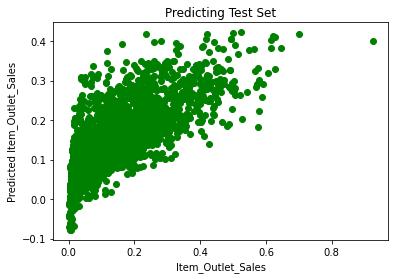

In [5]:
#import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#define the features and target
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
target = 'Item_Outlet_Sales'

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.2, random_state=0)

#create the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#evaluate the model
train_score = lin_reg.score(X_train, y_train)
test_score = lin_reg.score(X_test, y_test)
print("Train score: ", train_score)
print("Test score: ", test_score)

#predicting the test set results
y_pred = lin_reg.predict(X_test)


# evaluate the model
print("R^2: {}".format(lin_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


# Plotting the test set results
plt.scatter(y_test, y_pred, color = 'green')
plt.title('Predicting Test Set')
plt.xlabel(target)
plt.ylabel('Predicted ' + target)
plt.show()



# Reg regression

Train score:  0.5052952819587759
Test score:  0.508840154354616
R^2: 0.508840154354616
Root Mean Squared Error: 0.09185008701733469


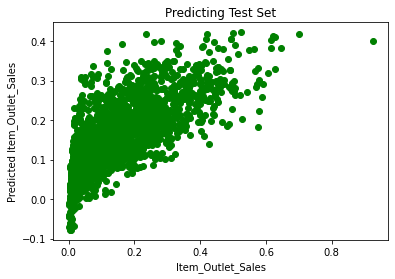

In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#define the features and target
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
target = 'Item_Outlet_Sales'

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.2, random_state=0)

#create the Ridge regression model with regularization parameter alpha = 0.5
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

#evaluate the model
train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)
print("Train score: ", train_score)
print("Test score: ", test_score)

#predicting the test set results
y_pred = ridge.predict(X_test)


# evaluate the model
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


# Plotting the test set results
plt.scatter(y_test, y_pred, color = 'green')
plt.title('Predicting Test Set')
plt.xlabel(target)
plt.ylabel('Predicted ' + target)
plt.show()



# Random Forest

Train score:  0.9334588675378535
Test score:  0.528706712721746
R^2: 0.528706712721746
Root Mean Squared Error: 0.08997332535463401


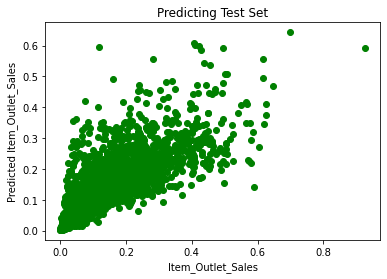

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#define the features and target
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
target = 'Item_Outlet_Sales'

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.2, random_state=0)

#create the random forest model with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

#evaluate the model
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
print("Train score: ", train_score)
print("Test score: ", test_score)

#predicting the test set results
y_pred = rf.predict(X_test)

# evaluate the model
print("R^2: {}".format(rf.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Plotting the test set results
plt.scatter(y_test, y_pred, color = 'green')
plt.title('Predicting Test Set')
plt.xlabel(target)
plt.ylabel('Predicted ' + target)
plt.show()


# XGB Model

Train score:  0.5540015355852801
Test score:  0.5458497648070729
R^2: 0.5458497648070729
Root Mean Squared Error: 0.08832180107648124


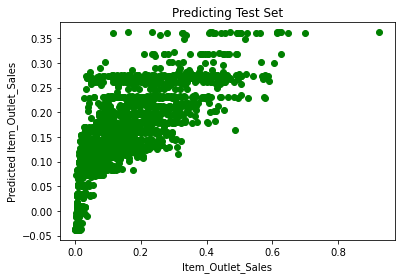

In [8]:

import xgboost as xgb
from sklearn.model_selection import train_test_split

#define the features and target
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
target = 'Item_Outlet_Sales'

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.2, random_state=0)

#create the XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(X_train,y_train)

#evaluate the model
train_score = xg_reg.score(X_train, y_train)
test_score = xg_reg.score(X_test, y_test)
print("Train score: ", train_score)
print("Test score: ", test_score)

#predicting the test set results
y_pred = xg_reg.predict(X_test)

# evaluate the model
print("R^2: {}".format(xg_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Plotting the test set results
plt.scatter(y_test, y_pred, color = 'green')
plt.title('Predicting Test Set')
plt.xlabel(target)
plt.ylabel('Predicted ' + target)
plt.show()